**About the data:**

**From the Overview section,**
"The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar."30% used in testing and 70% in training.

**Overview of Data**
Labels
So what exactly are stars, galaxies, and quasars? Had you asked me prior to starting this project, I would’ve not been able to answer (shame on me). Fortunately, Faraz’s notebook succinctly summarises what they are:

A GALAXY is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies are categorised according to their visual morphology as elliptical, spiral, or irregular. Many galaxies are thought to have supermassive black holes at their active centers.
A STAR is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.
A QUASAR, also known as quasi-stellar object, is an extremely luminous active galactic nucleus (AGN). The power radiated by quasars is enormous. The most powerful quasars have luminosities exceeding 1041 watts, thousands of times greater than an ordinary large galaxy such as the Milky Way.

**Features**

A summary of the more important features are:

ra, dec — right ascension and declination respectively

u, g, r, i, z — filter bands (a.k.a. photometric system or astronomical magnitudes)

run, rerun, camcol, field — descriptors of fields (i.e. 2048 x 1489 pixels) within image

redshift — increase in wavelength due to motion of astronomical object
plate — plate number


mjd — modified Julian date of observation

fiberid — optic fiber ID

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Skyserver_SQL2_27_2018 6_51_39 PM'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow import keras
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [4]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
data.shape

(10000, 18)

In [6]:
# drop the object id columns, they are of no use in the analysis
data.drop(['objid','specobjid'], axis=1, inplace=True)

In [7]:
data.head(20)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,GALAXY,0.040508,288,52000,400


In [8]:
data.shape

(10000, 16)

In [9]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [11]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

In [12]:
data.head(20)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0,0.040508,288,52000,400


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  int64  
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.2 MB


In [14]:
X = data.drop('class', axis=1)
y = data['class']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [16]:
#Show data
X[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

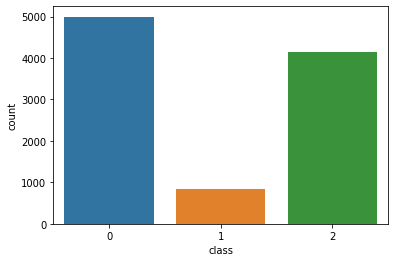

In [18]:
sns.countplot(x=data['class'])

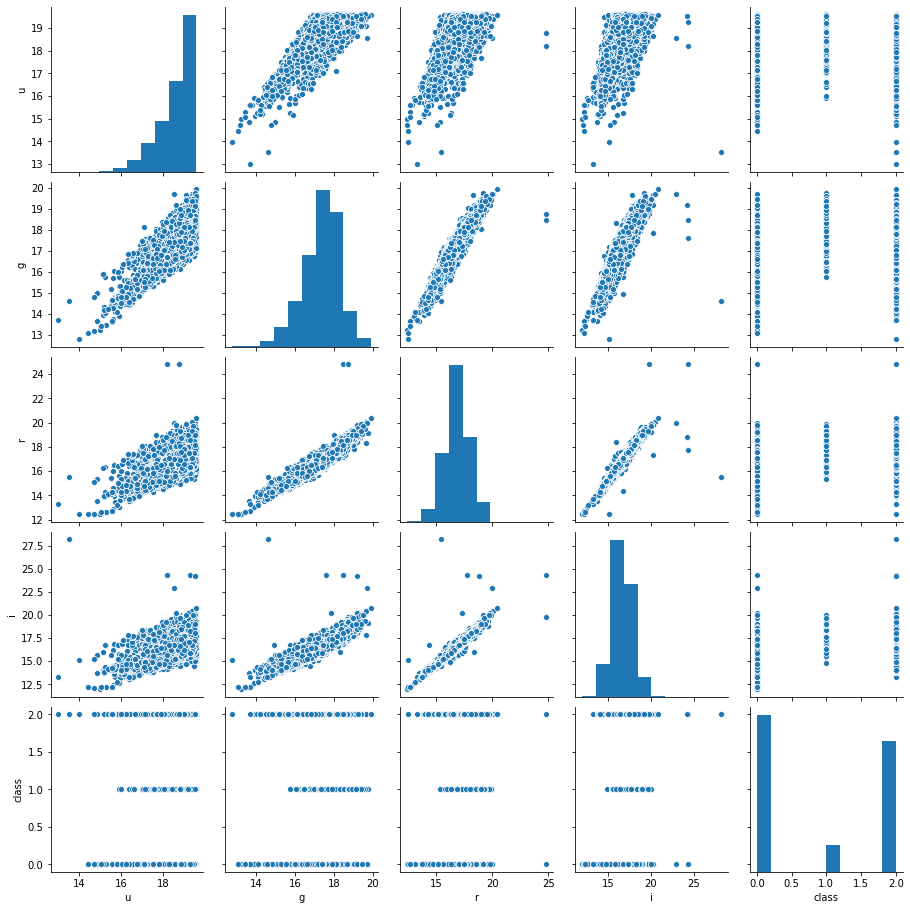

In [19]:
sns.pairplot(data[['u','g','r','i','class']])

In [20]:
# Decision Tree Classifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)
#------------------------------------------------------------------
#Linear Classifiers:
# 1- Logistic Regression
LRClassifer = LogisticRegression()
# # 2-Naive Bayes Classifier
# NBClassifer = MultinomialNB()
#-------------------------------------------------------------------
#Nearest Neighbor Classifier
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)
#-------------------------------------------------------------------
#Support Vector Machines Classifer
SVCModel = SVC()

In [21]:
dtClassifer.fit(X_train, y_train)
LRClassifer.fit(X_train, y_train)
#NBClassifer.fit(X_train, y_train)
NeNeClassifier.fit(X_train, y_train)
SVCModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
#y_predsNB = NBClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)
y_predsSVC = SVCModel.predict(X_test)

In [23]:
print(y_preds[:10],'\n',y_test[:10])
print("*******************************************************")
print(y_predsLR[:10],'\n',y_test[:10])
print("*******************************************************")
#print(y_predsNB[:10],'\n',y_test[:10])
#print("*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])
print("*******************************************************")
print(y_predsSVC[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64
*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64
*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64
*******************************************************
[0 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


In [24]:
print('accuracy_score by Decision Tree Classifier:',accuracy_score(y_true=y_test, y_pred=y_preds))
print('accuracy_score by LR Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsLR))
#print('accuracy_score by Naive Bayes Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsNB))
print('accuracy_score by Nearest Neighbor Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsNeNe))
print('accuracy_score by SVM Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsSVC))

accuracy_score by Decision Tree Classifier: 0.99
accuracy_score by LR Classifier: 0.976
accuracy_score by Nearest Neighbor Classifier: 0.9073333333333333
accuracy_score by SVM Classifier: 0.9533333333333334
